In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("슝=3")

슝=3


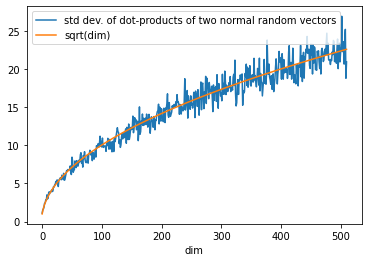

In [31]:
stds = []
for dim in range(1, 512):
    values = []
    for _ in range(100):
        t1 = np.random.randn(dim)
        t2 = np.random.randn(dim)
        values.append(t1 @ t2)
    stds.append(np.array(values).std())
    
plt.plot(stds, label='std dev. of dot-products of two normal random vectors')
plt.plot(np.sqrt(np.arange(1, 512)), label='sqrt(dim)')
plt.xlabel('dim')
plt.legend()
plt.show()

In [6]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # query : (batch, tgt_length, d_model)
  # key : (batch, src_length, d_model)
  # value : (batch, src_length, d_model)
 
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  # (batch, tgt_length, src_length)
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

print("슝=3")

슝=3


In [7]:
batch = 4
length = 100
d_model = 512
query = tf.random.normal(shape=(batch, length, d_model))
key = tf.random.normal(shape=(batch, length, d_model))
value = tf.random.normal(shape=(batch, length, d_model))
output = scaled_dot_product_attention(query, key, value, mask=None)
print(output)

tf.Tensor(
[[[ 0.02406924 -0.16199829  0.07362988 ...  0.08531263 -0.17576213
    0.19591375]
  [ 0.07065731 -0.02584487  0.16404346 ... -0.13456354  0.02217139
    0.06279675]
  [ 0.02897475  0.03258519 -0.04446549 ...  0.12525943  0.24061805
   -0.12723558]
  ...
  [-0.11477974  0.01531122  0.27778968 ... -0.26345643 -0.05430143
    0.26289433]
  [-0.07701159  0.00545139 -0.10618211 ... -0.06831981  0.09595829
    0.07799111]
  [-0.01867032 -0.07845555  0.00936964 ... -0.2745659  -0.1617597
    0.11516005]]

 [[-0.02102141  0.18850532 -0.04248023 ... -0.12552676 -0.01903477
    0.05181385]
  [-0.20604289  0.21555403 -0.18753423 ...  0.02624437 -0.11807816
    0.08313714]
  [ 0.19891793  0.28835014 -0.07600558 ...  0.04917058 -0.13354085
   -0.15402327]
  ...
  [-0.11829226 -0.03375638  0.04405561 ...  0.19243903 -0.2310247
   -0.11698242]
  [-0.0249983   0.06462385 -0.11517861 ...  0.21911006 -0.17672454
   -0.0329453 ]
  [-0.20366053  0.20136237 -0.15465727 ... -0.16841806 -0.185090